In [1]:
import logging
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
from lab_utils_common import dlc, sigmoid
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2024-07-30 17:45:26.876664: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-30 17:45:27.260855: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-30 17:45:27.264499: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 17:45:29.314163: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Dataset
X, Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


In [3]:
good = Y == 1
bad = Y == 0
good = good.reshape(1, -1)[0]
bad = bad.reshape(1, -1)[0]

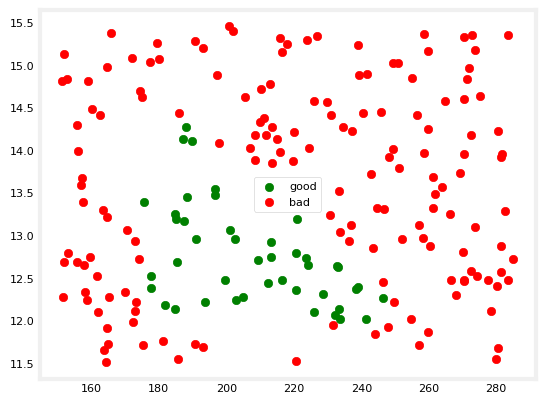

In [4]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X[good, 0], X[good, 1], color='green', label='good')
ax.scatter(X[bad, 0], X[bad, 1], color='red', label='bad')
plt.legend()
plt.show()

In [5]:
print(
    f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(
    f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(
    f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(
    f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [6]:
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1.0/(1.0+np.exp(-z))

In [7]:
def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units|
    """
    units = W.shape[1]
    a_out = np.zeros(units)
    for u in range(units):
        w = W[:, u]
        z = np.dot(w, a_in) + b[u]
        a_out[u] = g(z)
    return a_out

In [8]:
def my_sequential(x, W1, b1, W2, b2):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    return (a2)

In [9]:
W1_tmp = np.array([[-8.93,  0.29, 12.9], [-0.1,  -7.32, 10.81]])
b1_tmp = np.array([-9.82, -9.28,  0.96])
W2_tmp = np.array([[-31.18], [-27.59], [-32.56]])
b2_tmp = np.array([15.41])

In [10]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m, 1))
    for i in range(m):
        p[i, 0] = my_sequential(X[i], W1, b1, W2, b2)
    return (p)

In [11]:
X_tst = np.array([
    [200, 13.9],  # postive example
    [200, 17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

In [12]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]
